# Car License Plate Detection and Recognition using YOLOv8 and EasyOCR

## Table of contents
1. [Introduction](#introduction)
2. [Dataset Preparation](#dataset-preparation)
3. [YOLOv8 Model Training](#yolov8-training)
4. [License Plate Detection](#detection)
5. [OCR using EasyOCR](#easyocr)
6. [Conclusion](#conclusion)

## 1. Introduction<a name="introducion"></a>

In this project, we aim to build an automated car license plate detection and recognition system using YOLOv8 and EasyOCR. The system will check if a car's license plate is in an authorized database for parking lot access. This Python notebook demonstrates the entire process, from dataset preparation to the final verification of parking access.

[YOLOv8](https://docs.ultralytics.com)(You Only Look Once v8) is a state-of-the-art object detection model that belongs to the YOLO family of object detectors. It is designed for real-time object detection and can identify multiple objects in a single forward pass through the network. YOLOv8 is built on the [Darknet](https://github.com/pjreddie/darknet) framework and uses anchor boxes, which are predefined bounding box dimensions, to improve detection accuracy for objects with varying aspect ratios. YOLOv8 is particularly well-suited for this project due to its speed, accuracy, and ability to detect small objects, such as license plates.

[EasyOCR](https://github.com/JaidedAI/EasyOCR) is an optical character recognition (OCR) library developed by the Jaided AI team. It is designed to recognize text in images, even under challenging conditions such as low-resolution images or distorted text. EasyOCR supports multiple languages and utilizes a combination of deep learning techniques, including Convolutional Neural Networks (CNNs) and Long Short-Term Memory (LSTM) networks, to accurately recognize text from various backgrounds and orientations.

In the following sections, we will prepare a dataset of car images with labeled license plates, train the YOLOv8 model for license plate detection, utilize EasyOCR to read the detected license plates, and finally, verify if the recognized license plate number is in the authorized database for parking lot access.

## 2. Dataset Preparation<a name="dataset-preparation"></a>

To train the YOLOv8 model, we need a dataset containing car images with labeled license plates. Creating a suitable dataset for YOLOv8 training involves several key steps, including data collection, labeling, and preprocessing. In this case, we will be using a dataset retrieved from Roboflow, a platform that provides various tools to streamline the process of preparing datasets for deep learning models.

In this section, we will cover the following steps:

* Introduction to Roboflow
* Import necessary libraries
* Load the dataset from Roboflow
* Visualize the dataset

### Introduction to Roboflow

[Roboflow](https://app.roboflow.com/) is a platform that simplifies the process of creating, managing, and deploying datasets for computer vision applications. It provides various tools for dataset annotation, versioning, augmentation, and conversion, making it easier to prepare data for training and validating deep learning models like YOLOv8. Roboflow also offers a collection of pre-built datasets, which can be directly imported and used for training purposes.

### Import necessary libraries

Before we proceed with dataset preparation, we need to import the necessary Python libraries to work with Roboflow.

In [8]:
from roboflow import Roboflow # pip install roboflow

### Load the dataset from Roboflow

Next, we will load the car license plate dataset from Roboflow. To do this, you will need to create an account on Roboflow and obtain an API key. Once you have found a dataset that fits for your goal, you can load the dataset by pressing on *"Download this dataset"* and selecting the option *"Show download code"*. This option will give you the necessary code to load the dataset in your project.

The next snippet of code will show how to load a dataset from Roboflow once you have created your own account and you have your API key in a .env file within your own project.

In [ ]:
import os
from dotenv import load_dotenv 

# Retrieving the API key from your .env file
dotenv_path = os.path.join(os.getcwd(), '.env')
load_dotenv(dotenv_path)

api_key = os.getenv('ROBOFLOW_API_KEY') 

# Loading the dataset from Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("project-n3wam").project("project-ttd5y")
dataset = project.version(1).download("yolov8")

### Visualize the dataset

Let's see how our dataset looks like by printing some of the images of the dataset.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

train_images_path = "Project-1/train/images"
images = [random.choice(os.listdir(train_images_path)) for i in range(5)] # Select 5 images randomly from the train set

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, ax in enumerate(axes):
    img_path = os.path.join(train_images_path, images[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. YOLOv8 Model Training<a name="yolov8-training"></a>

In this section, we will train the YOLOv8 model on our prepared dataset. Training a deep learning model like YOLOv8 involves adjusting the model's weights and biases based on the input-output relationship learned from the training data. The goal is to minimize the difference between the model's predictions and the ground truth labels of the training dataset. We will cover the following steps in this section:

* YOLOv8 architecture overview
* Define model configuration
* Train the model
* Evaluate the model's performance
* Save the trained model

### YOLOv8 architecture overview

YOLOv8 is an advanced version of the YOLO family of object detectors, which is designed for real-time object detection. The architecture is built on the Darknet framework and utilizes multiple convolutional layers to learn and extract features from the input images. YOLOv8 uses anchor boxes, which are predefined bounding box dimensions, to improve detection accuracy for objects with varying aspect ratios. The model predicts class probabilities and bounding box coordinates simultaneously in a single forward pass through the network, making it highly efficient for real-time applications.

### Define model configuration

Within the different model configurations, we can select one of the following when using YOLOv8 for object detection purposes:

<center>

| Model	| size (pixels)	| mAP<sup>val</sup><sub>50-95</sub>	| Speed<sub>CPU ONNX (ms)</sub> |Speed<sub>A100 TensorRT (ms)</sub>|	params (M)	| FLOPs (B) |
| :--- | :--- | :--- | :--- | :---| :--- | :---|
| YOLOv8n|	640|	37.3|	80.4|	0.99|	3.2|	8.7|
|YOLOv8s|	640|	44.9|	128.4|	1.20|	11.2|	28.6|
|YOLOv8m|	640|	50.2|	234.7|	1.83|	25.9|	78.9|
|YOLOv8l	|640	|52.9	|375.2	|2.39	|43.7	|165.2|
|YOLOv8x	|640	|53.9	|479.1	|3.53	|68.2	|257.8|

</center>

In [ ]:
from ultralytics import YOLO

# Load the model's yaml to train from scratch
model = YOLO('yolov8n.yaml')

### Train the model

There are several training settings to consider when training a YOLO model. The model configuration and hyperparameters selected may affect the model's performance, speed, and accuracy. Following the [official documentation](https://docs.ultralytics.com/modes/train/#arguments), the available arguments to train the model are:

<center>

| Key | Value | Description |
| :--- | :--- | :--- |
| `model` | `None` | path to model file, i.e. yolov8n.pt, yolov8n.yaml |
| `data` | `None` | path to data file, i.e. coco128.yaml |
| `epochs` | `100` | number of epochs to train for |
| `patience` | `50 `| epochs to wait for no observable improvement for early stopping of training |
| `batch` | `16` | number of images per batch (`-1` for AutoBatch) |
| `imgsz` | `640` | size of input images as integer or w,h |
| `save` | `True` | save train checkpoints and predict results |
| `save_period` | `-1` | save checkpoint every $x$ epochs (disabled if < 1) |
| `cache` | `False` | `True`/`ram`, `disk` or `False`. Use cache for data loading |
| `device` | `None` | device to run on, i.e. cuda `device=0` or `device=0,1,2,3` or `device=cpu` |
| `workers` | `8` | number of worker threads for data loading (per RANK if DDP) |
| `project`| `None` | project name |
| `name` | `None` | experiment name |
| `exist_ok` | `False` | whether to overwrite existing experiment |
| `pretrained` | `False` | whether to use a pretrained model |
| `optimizer`| `'SGD'` | optimizer to use, `choices=['SGD', 'Adam', 'AdamW', 'RMSProp']` |
| `verbose`	| `False` | whether to print verbose output |
| `seed` | `0` | random seed for reproducibility |
| `deterministic` | `True`	| whether to enable deterministic mode |
| `single_cls`	| `False` | train multi-class data as single-class |
| `image_weights` |	`False` | use weighted image selection for training |
| `rect` | `False` | rectangular training with each batch collated for minimum padding |
| `cos_lr` | `False`	| use cosine learning rate scheduler| 
|`close_mosaic`|	`0`|	(int) disable mosaic augmentation for final epochs|
|`resume`|	`False`|	resume training from last checkpoint|
|`amp`|	`True`	|Automatic Mixed Precision (AMP) training, `choices=[True, False]`|
|`lr0`|	`0.01`|	initial learning rate (i.e. SGD=1E-2, Adam=1E-3)|
|`lrf`|	`0.01`|	final learning rate (lr0 * lrf)|
|`momentum`|	`0.937`|	SGD momentum/Adam beta1|
|`weight_decay`|	`0.0005`|	optimizer weight decay 5e-4|
|`warmup_epochs`|	`3.0`|	warmup epochs (fractions ok)|
|`warmup_momentum`|	`0.8`|	warmup initial momentum|
|`warmup_bias_lr`|	`0.1`|	warmup initial bias lr|
|`box`|	`7.5`|	box loss gain|
|`cls`|	`0.5`|	cls loss gain (scale with pixels)|
|`dfl`|	`1.5`|	dfl loss gain|
|`pose`|	`12.0`	|pose loss gain (pose-only)|
|`kobj`|	`2.0`	|keypoint obj loss gain (pose-only)|
|`label_smoothing`	|`0.0`	|label smoothing (fraction)|
|`nbs`	|`64`|	nominal batch size|
|`overlap_mask`|	`True`|	masks should overlap during training (segment train only)|
|`mask_ratio`|	`4`|	mask downsample ratio (segment train only)|
|`dropout`|	`0.0`|	use dropout regularization (classify train only)|
|`val`|	`True`|	validate/test during training|

</center>

In [7]:
# Train the model using the 'data.yaml' of the dataset
results = model.train(data='./Project-1/data.yaml', epochs=100)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.Conv                  [128

### Evaluate the model's performance

Validation settings for YOLO models refer to the various hyperparameters and configurations used to evaluate the model's performance on a validation dataset. These settings can affect the model's performance, speed, and accuracy. Some common YOLO validation settings include the batch size, the frequency with which validation is performed during training, and the metrics used to evaluate the model's performance. Other factors that may affect the validation process include the size and composition of the validation dataset and the specific task the model is being used for. It is important to carefully tune and experiment with these settings to ensure that the model is performing well on the validation dataset and to detect and prevent overfitting.

<center>

|Key	|Value	|Description|
|:---|:---|:---|
|`data`	|`None`	|path to data file, i.e. coco128.yaml|
|`imgsz`	|`640`	|image size as scalar or (h, w) list, i.e. (640, 480)|
|`batch`	|`16`	|number of images per batch (-1 for AutoBatch)|
|`save_json`	|`False`	|save results to JSON file|
|`save_hybrid`	|`False`	|save hybrid version of labels (labels + additional predictions)|
|`conf`	|`0.001`	|object confidence threshold for detection|
|`iou`	|`0.6`	|intersection over union (IoU) threshold for NMS|
|`max_det`	|`300`	|maximum number of detections per image|
|`half`	|`True`	|use half precision (FP16)|
|`device`	|`None`	|device to run on, i.e. cuda device=0/1/2/3 or device=cpu|
|`dnn`	|`False`	|use OpenCV DNN for ONNX inference|
|`plots`	|`False`	|show plots during training|
|`rect`	|`False`	|rectangular val with each batch collated for minimum padding|
|`split`	|`val`	|dataset split to use for validation, i.e. 'val', 'test' or 'train'|

</center>

In [10]:
results = model.val()

Ultralytics YOLOv8.0.81 🚀 Python-3.8.16 torch-2.0.0 CPU
val: Scanning /Users/albertorag/datasets/Project-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:41<00:00,  3.16s/it]
                   all        200        218      0.957      0.952      0.985      0.887
       d_license_plate        200        107      0.954      0.967      0.984      0.877
      pl_license_plate        200        111       0.96      0.937      0.986      0.897
Speed: 3.2ms preprocess, 193.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /Users/albertorag/runs/detect/val8


### Export the trained model

We can also export the model to other formats in order to use it in other platforms. The available formats to export the YOLO model are the following.

<center>

|Format	|`format` Argument|	Model|	Metadata|
|:---|:---|:---|:---|
|[PyTorch](https://pytorch.org/)| -	|`yolov8n.pt`	| ✅ |
|[TorchScript](https://pytorch.org/docs/stable/jit.html) |`torchscript`	|`yolov8n.torchscript`	|✅ |
|[ONNX](https://onnx.ai/)	|`onnx`	|`yolov8n.onnx`	|✅|
|[OpenVINO](https://docs.openvino.ai/latest/index.html)	|`openvino`	|`yolov8n_openvino_model`/	|✅|
|[TensorRT](https://developer.nvidia.com/tensorrt)	|`engine`	|`yolov8n.engine`	|✅|
|[CoreML](https://github.com/apple/coremltools)	|`coreml`	|`yolov8n.mlmodel`	|✅|
|[TF SavedModel](https://www.tensorflow.org/guide/saved_model)	|`saved_model`	|`yolov8n_saved_model`/	|✅|
|[TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph)	|`pb`	|`yolov8n.pb`	|❌|
|[TF Lite](https://www.tensorflow.org/lite)	|`tflite`	|`yolov8n.tflite`	|✅|
|[TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)	|`edgetpu`	|`yolov8n_edgetpu.tflite`	|✅|
|[TF.js](https://www.tensorflow.org/js)	|`tfjs`	|`yolov8n_web_model`/	|✅|
|[PaddlePaddle](https://github.com/PaddlePaddle)	|`paddle`	|`yolov8n_paddle_model`/	|✅|

</center>

In [12]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.81 🚀 Python-3.8.16 torch-2.0.0 CPU

PyTorch: starting from /Users/albertorag/runs/detect/train13/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.13.1 opset 17...
ONNX: export success ✅ 0.9s, saved as /Users/albertorag/runs/detect/train13/weights/best.onnx (11.7 MB)

Export complete (1.4s)
Results saved to /Users/albertorag/runs/detect/train13/weights
Predict:         yolo predict task=detect model=/Users/albertorag/runs/detect/train13/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/Users/albertorag/runs/detect/train13/weights/best.onnx imgsz=640 data=./Project-1/data.yaml 
Visualize:       https://netron.app


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'/Users/albertorag/runs/detect/train13/weights/best.onnx'

## 4. License Plate Detection<a name="detection"></a>

Now that our YOLOv8 model is trained, we can use it to detect license plates in new car images, unseen previously by the model. We will first create a `show_detection` function to show the bounding boxes of the objects detected by our model.

In [13]:
import cv2

def show_detection(image_path:str):
    """
    Arguments:
    ----------
        - `image_path`: `str`
            Path to the image to be analyzed.

    Returns:
    --------
        Image with the bounding boxes of the objects detected.
    """
    # Apply the model on the image
    results_list = model(source=image_path)

    # Load image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Iterate through the results_list
    for i, results in enumerate(results_list):
        # Iterate through the data
        for result in results.boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = int(result.xyxy[0][0]), int(result.xyxy[0][1]), int(result.xyxy[0][2]), int(result.xyxy[0][3])
            
            # Extract label and confidence
            label = "Car License Plate"
            
            # Define box color and thickness
            color = (255, 0, 0)
            thickness = 2
            
            # Draw the bounding box on the image
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, thickness)
            
            # Add label text
            cv2.putText(image_rgb, f"{label}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
    
    # Convert the image to PIL format and display
    image_pil = Image.fromarray(image_rgb)
    display(image_pil)

Now we can perform detections on new images by calling to the `show_detection` function.


image 1/1 /Users/albertorag/Documents/personal-projects/personal-portfolio/projects/ObjectDetection_carLicensePlates/test-images/test_1.webp: 448x640 1 d_license_plate, 236.4ms
Speed: 2.6ms preprocess, 236.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


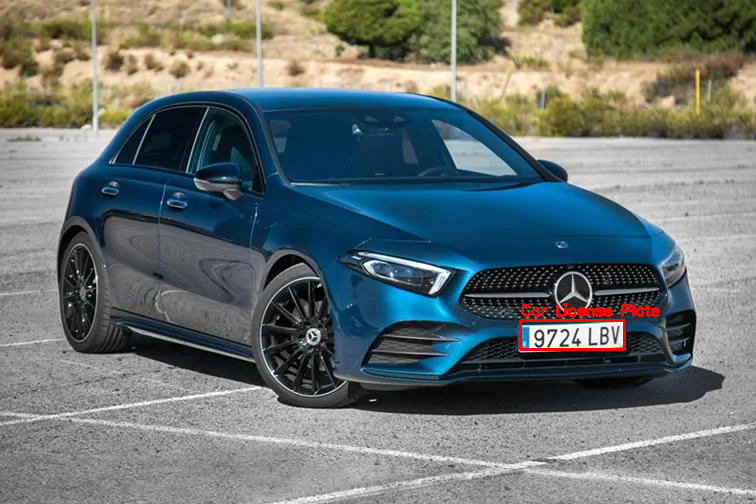

In [25]:
image_path = "test-images/test_1.webp"
show_detection(image_path)

## 5. OCR using EasyOCR <a name="easyocr"></a>

We have already built a model that detects car license plates. However, it only shows where the license plate is located and it doesn't provide us with its actual text or numbers. At this point, we can now use EasyOCR to read the text from the license plates. Optical character recognition (OCR) is a technique used to convert text in images into machine-readable format.

We will just need to adapt a few lines of the `show_detection` function to use EasyOCR on the license plates.

In [22]:
import easyocr

def show_detection_with_text(image_path:str):
    """
    Arguments:
    ----------
        - `image_path`: `str`
            Path to the image to be analyzed.

    Returns:
    --------
        Image with the bounding boxes of the objects detected.
    """
    # Apply the model on the image
    results_list = model(source=image_path)

    # Load image using OpenCV
    image = cv2.imread(image_path)
    
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Iterate through the results_list
    for i, results in enumerate(results_list):
        # Iterate through the data
        for result in results.boxes:
            # Extract bounding box coordinates
            x1, y1, x2, y2 = int(result.xyxy[0][0]), int(result.xyxy[0][1]), int(result.xyxy[0][2]), int(result.xyxy[0][3])
            
            # Crop the frame to the license plate region
            plate_region = image[y1:y2, x1:x2]
            
            # Convert the cropped region to grayscale
            plate_gray = cv2.cvtColor(plate_region, cv2.COLOR_BGR2GRAY)
            
            # Extract license plate numbers using EasyOCR
            reader = easyocr.Reader(['en'])
            plate_numbers = reader.readtext(plate_gray, detail=0, paragraph=False)
            
            # Use the extracted numbers as the label for the bounding box
            label = plate_numbers[0] if len(plate_numbers) > 0 else 'Unknown'
            
            # Define box color and thickness
            color = (255, 0, 0)
            thickness = 2
            
            # Draw the bounding box on the image
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, thickness)
            
            # Add label text
            cv2.putText(image_rgb, f"{label}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
    
    # Convert the image to PIL format and display
    image_pil = Image.fromarray(image_rgb)
    display(image_pil)


image 1/1 /Users/albertorag/Documents/personal-projects/personal-portfolio/projects/ObjectDetection_carLicensePlates/test-images/test_1.webp: 448x640 1 d_license_plate, 170.1ms
Speed: 1.7ms preprocess, 170.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


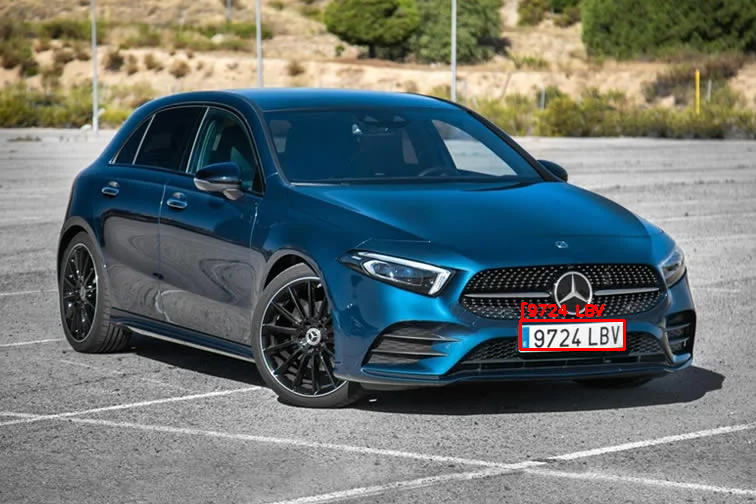

In [26]:
image_path = "test-images/test_1.webp"
show_detection_with_text(image_path)

We can also use our model to detect the license plates (as well as the text in it) using a video as input.

In [39]:
import cv2
import easyocr

def process_frame(frame, model, reader, scale=0.5):
    # Resize the frame to speed up the process
    frame_resized = cv2.resize(frame, (0, 0), fx=scale, fy=scale)
    
    results_list = model(frame_resized)

    for results in results_list:
        for result in results.boxes:
            x1, y1, x2, y2 = int(result.xyxy[0][0]), int(result.xyxy[0][1]), int(result.xyxy[0][2]), int(result.xyxy[0][3])

            # Scale the coordinates back to the original frame size
            x1, y1, x2, y2 = int(x1 / scale), int(y1 / scale), int(x2 / scale), int(y2 / scale)

            color = (255, 0, 0)
            thickness = 2

            plate_region = frame[y1:y2, x1:x2]
            plate_gray = cv2.cvtColor(plate_region, cv2.COLOR_BGR2GRAY)
            
            plate_numbers = reader.readtext(plate_gray, detail=0, paragraph=False)

            label = plate_numbers[0] if len(plate_numbers) > 0 else 'Unknown'
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
            cv2.putText(frame, f"{label}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
    
    return frame

def save_detection_video(input_video_path, output_video_path, model):
    cap = cv2.VideoCapture(input_video_path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    reader = easyocr.Reader(['en'])
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        processed_frame = process_frame(frame, model, reader)
        out.write(processed_frame)

    cap.release()
    out.release()



In [40]:
# Save the video with the bounding box and label
input_video_path = 'test-videos/test_video_1.mp4'
output_video_path = 'output-videos/output_video.mp4'
save_detection_video(input_video_path, output_video_path, model)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.

0: 416x640 1 d_license_plate, 122.5ms
Speed: 1.1ms preprocess, 122.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 122.9ms
Speed: 1.3ms preprocess, 122.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 119.0ms
Speed: 1.2ms preprocess, 119.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 120.4ms
Speed: 1.3ms preprocess, 120.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 116.5ms
Speed: 1.0ms preprocess, 116.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 118.0ms
Speed: 1.1ms preprocess, 118.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 1 d_license_plate, 116.6ms
Speed: 1.0ms preprocess, 116.6ms inference, 0.7ms post

## 6. Conclusion <a name="conclusion"></a>

In this Python notebook, we demonstrated the process of building an automated car license plate detection and recognition system using YOLOv8 and EasyOCR. The following steps were covered:

* Preparing a dataset with labeled car license plates using Roboflow
* Training a YOLOv8 model for license plate detection
* Using the trained model to detect license plates in car images
* Reading the detected license plates using EasyOCR
* Visualizing the detection and recognition results

This project showcases the potential of combining state-of-the-art object detection and optical character recognition techniques to create practical applications, such as secure parking lot access systems, toll booth automation, and traffic monitoring solutions.

Possible future improvements for this project include:

* Expanding the dataset to cover a wider range of license plate styles and variations
* Implementing a more robust OCR solution to improve recognition accuracy, especially for challenging conditions such as low light, motion blur, or distorted plates
* Integrating the system with a web or mobile app for remote monitoring and management of parking lot access

We hope that this Python notebook serves as a valuable reference for your own projects and provides a solid foundation for developing advanced computer vision applications.